In [3]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sqlite3


In [5]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r"C:\Users\surec\Downloads\password_resources/password_Data.sqlite")

In [6]:
#### check online its table name on https://sqliteonline.com/
data = pd.read_sql_query("SELECT * FROM Users" , con)

In [7]:
data.shape

(100000, 3)

In [8]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [9]:
data.describe()

,index,strength
count,100000.000000,100000.000000
mean,49999.500000,0.988730
std,28867.657797,0.510926
min,0.000000,0.000000
25%,24999.750000,1.000000
50%,49999.500000,1.000000
75%,74999.250000,1.000000
max,99999.000000,2.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [11]:
data.isnull()

,index,password,strength
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
99995,False,False,False
99996,False,False,False
99997,False,False,False
99998,False,False,False


In [12]:
data.isnull().sum()

index       0
password    0
strength    0
dtype: int64

In [13]:
data.drop(['index'], axis=1,inplace =True)

In [14]:
data


,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [15]:
data.duplicated().any()

False

In [16]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [17]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [18]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [19]:
data[data['password'].str.isalpha()].shape

(50, 2)

In [20]:
data[data['password'].str.isalnum()].shape

(97203, 2)

In [21]:
data[data['password'].str.isupper()].shape

(1506, 2)

In [22]:
data[data['password'].str.istitle()].shape

(932, 2)

In [23]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [24]:
import string

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def in_not(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else: 
            pass

In [27]:
data['password'].apply(in_not)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [28]:
data[data['password'].apply(in_not)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [29]:
password = 'reftR4'

In [30]:
password.islower()

False

In [31]:
[char for char in password if char.islower()]

['r', 'e', 'f', 't']

In [32]:
len([char for char in password if char.islower()])

4

In [33]:
len([char for char in password if char.islower()])/len(password)

0.6666666666666666

In [34]:
def howmany_lower(row):
    return (len([char for char in row if char.islower()])/len(row))

In [35]:
data['password'].apply(howmany_lower)

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [36]:
data['lower_case_frequency'] = np.round(data['password'].apply(howmany_lower) ,3)

In [37]:
def howmany_upper(row):
    return (len([char for char in row if char.isupper()])/len(row))

In [38]:
data['upper_case_frequency'] = np.round(data['password'].apply(howmany_upper) ,3)

In [39]:
def howmany_digit(row):
    return (len([char for char in row if char.isdigit()])/len(row))

In [40]:
data['digit_case_frequency'] = np.round(data['password'].apply(howmany_digit) ,3)

In [41]:
data.head()

,password,strength,lower_case_frequency,upper_case_frequency,digit_case_frequency
0,zxe870819,1,0.333,0.0,0.667
1,xw46454nr23l,1,0.417,0.0,0.583
2,soporte13,1,0.778,0.0,0.222
3,accounts6000webhost.com,2,0.783,0.0,0.174
4,c443balg,1,0.625,0.0,0.375


In [42]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [43]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [44]:
data["special_char_freq"].unique()

array([ 0,  1,  5,  2,  3,  6,  4, 10,  9,  7, 20,  8, 21], dtype=int64)

In [48]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [46]:
data["length"] = data["password"].str.len() 

In [50]:
data[['length','strength']].groupby(['strength']).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [52]:
col  = ['length','lower_case_frequency','upper_case_frequency','digit_case_frequency']

for i in col:
    print(data[[i,'strength']].groupby(['strength']).agg(["min","max","mean","median"]))

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
         lower_case_frequency                        
                          min    max      mean median
strength                                             
0                         0.0  1.000  0.708050  0.714
1                         0.0  0.923  0.630067  0.667
2                         0.0  0.917  0.424679  0.400
         upper_case_frequency                        
                          min    max      mean median
strength                                             
0                         0.0  1.000  0.012872  0.000
1                         0.0  0.923  0.007915  0.000
2                         0.0  0.889  0.367633  0.429
         digit_case_frequency                        
                          min    max      mean median
strength  

In [54]:
data.head()


,password,strength,lower_case_frequency,upper_case_frequency,digit_case_frequency,special_char_freq,length
0,zxe870819,1,0.333,0.0,0.667,0.000000,9
1,xw46454nr23l,1,0.417,0.0,0.583,0.000000,12
2,soporte13,1,0.778,0.0,0.222,0.000000,9
3,accounts6000webhost.com,2,0.783,0.0,0.174,0.043478,23
4,c443balg,1,0.625,0.0,0.375,0.000000,8


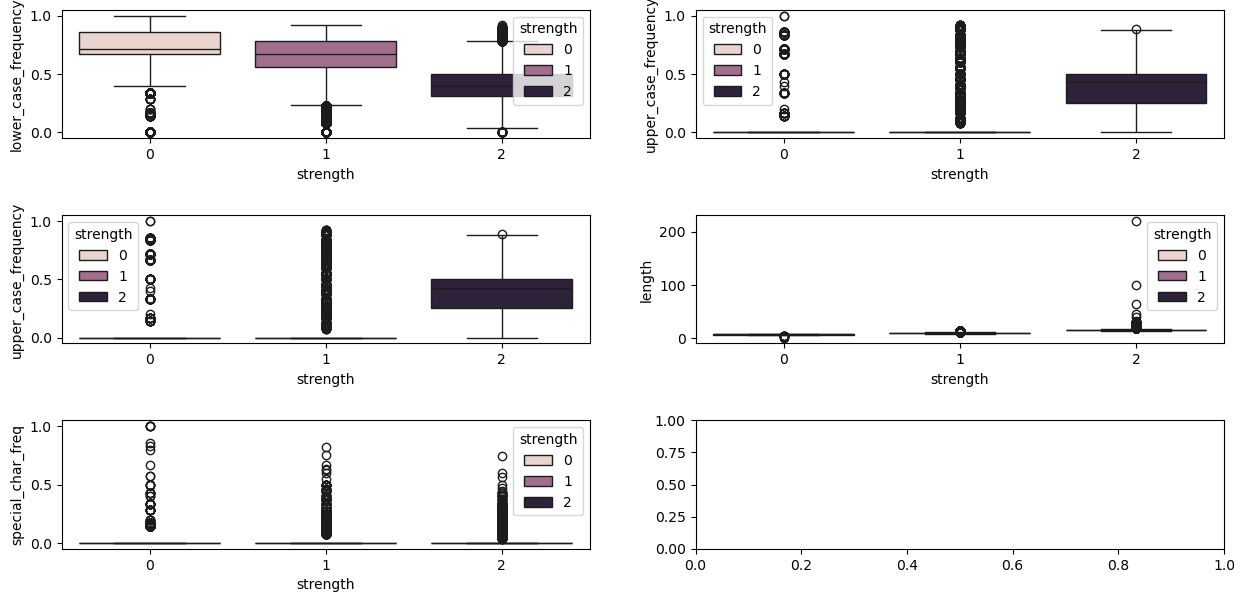

In [56]:
fig ,((ax1,ax2),(ax3,ax4),(ax5,ax6))  = plt.subplots(3,2,figsize=(15,7))

sns.boxplot(x='strength',y='lower_case_frequency',hue = 'strength',ax = ax1,data = data)
sns.boxplot(x='strength',y='upper_case_frequency',hue = 'strength',ax = ax2,data =data)
sns.boxplot(x='strength',y='upper_case_frequency',hue = 'strength',ax = ax3,data =data)
sns.boxplot(x='strength',y='length',hue = 'strength',ax = ax4,data =data)
sns.boxplot(x='strength',y='special_char_freq',hue = 'strength',ax = ax5,data =data)
plt.subplots_adjust(hspace=0.6)
plt.show()


In [60]:
data.columns

Index(['password', 'strength', 'lower_case_frequency', 'upper_case_frequency',
       'digit_case_frequency', 'special_char_freq', 'length'],
      dtype='object')

In [62]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [64]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

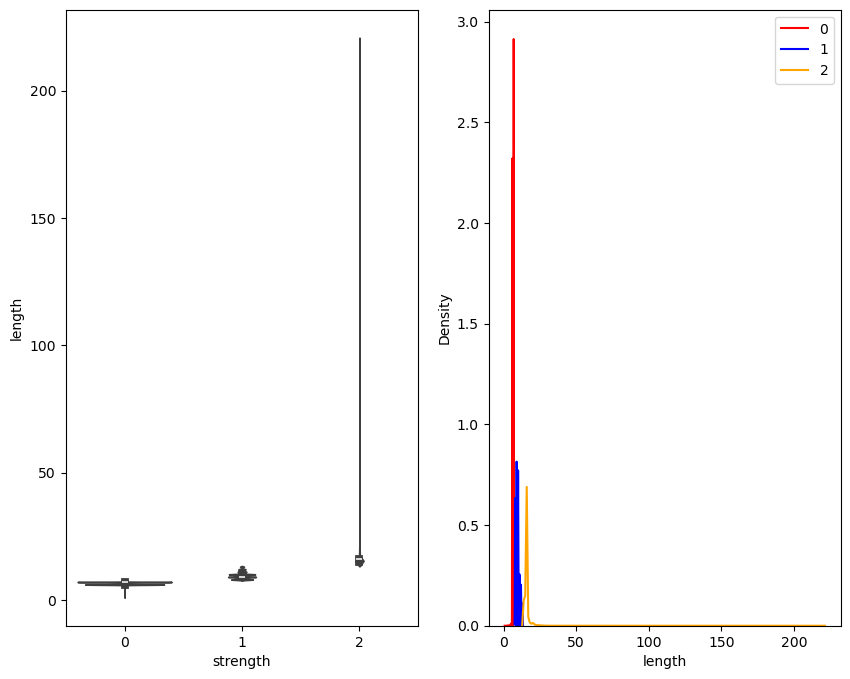

In [66]:
get_dist(data , "length")

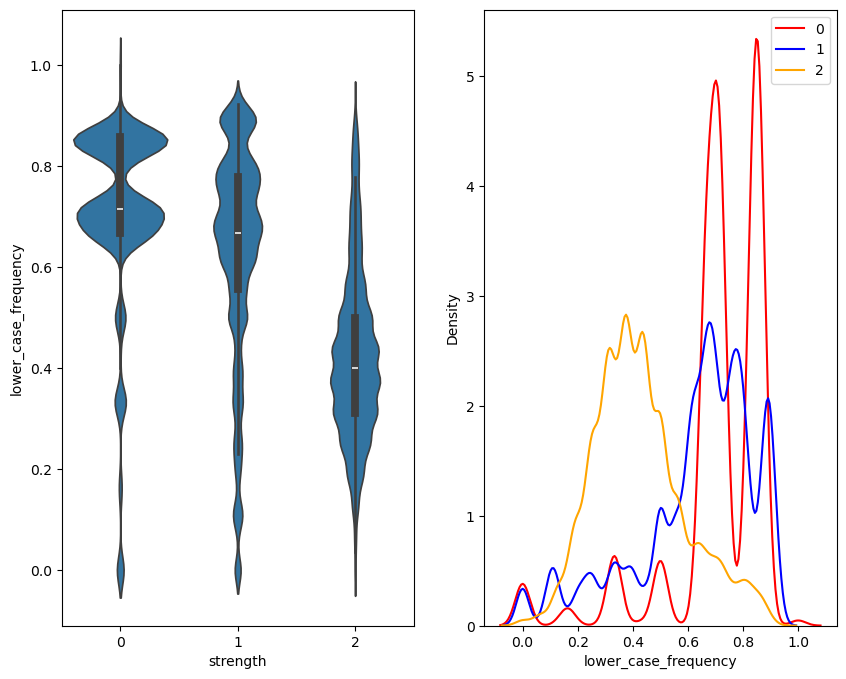

In [70]:
get_dist(data , 'lower_case_frequency')

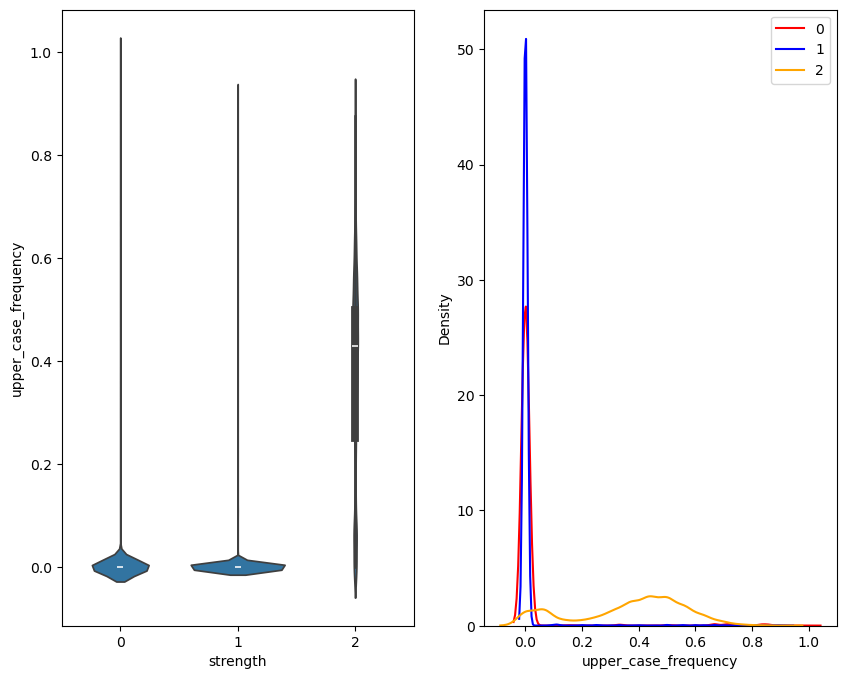

In [72]:
get_dist(data , 'upper_case_frequency')

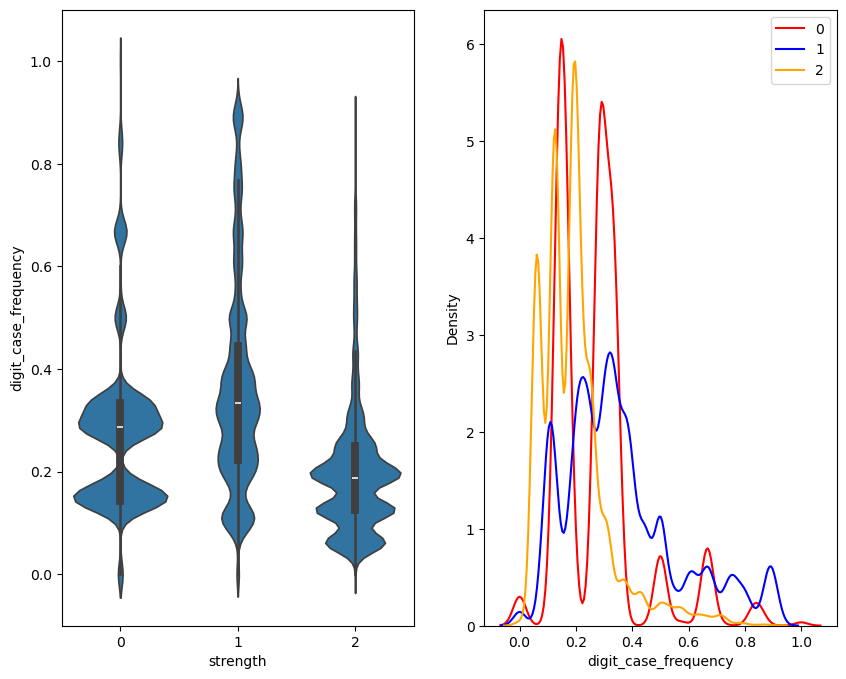

In [76]:
get_dist(data , 'digit_case_frequency')

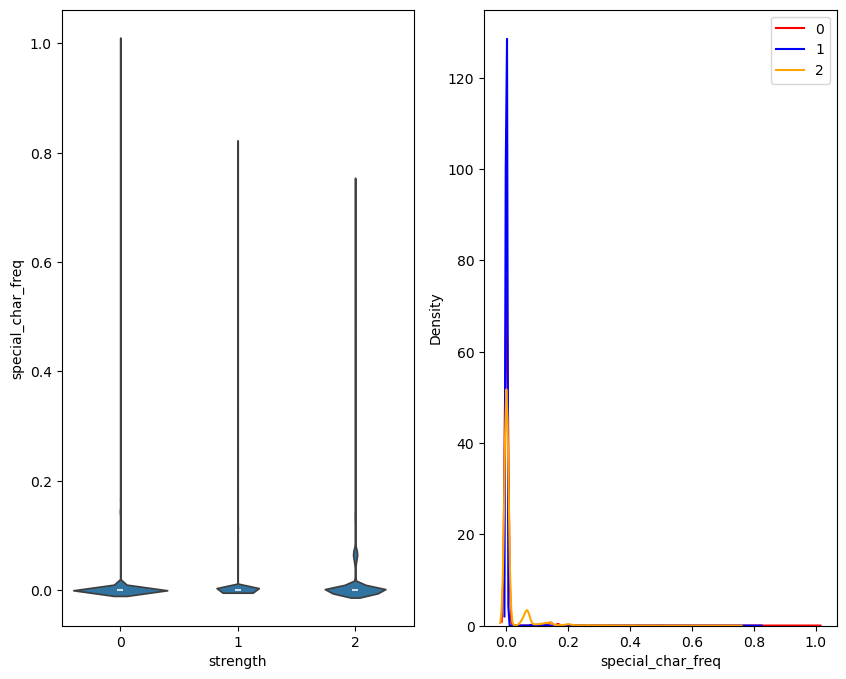

In [78]:
get_dist(data , 'special_char_freq')

In [80]:
data.head(4)

,password,strength,lower_case_frequency,upper_case_frequency,digit_case_frequency,special_char_freq,length
0,zxe870819,1,0.333,0.0,0.667,0.000000,9
1,xw46454nr23l,1,0.417,0.0,0.583,0.000000,12
2,soporte13,1,0.778,0.0,0.222,0.000000,9
3,accounts6000webhost.com,2,0.783,0.0,0.174,0.043478,23


In [82]:
data

,password,strength,lower_case_frequency,upper_case_frequency,digit_case_frequency,special_char_freq,length
0,zxe870819,1,0.333,0.0,0.667,0.000000,9
1,xw46454nr23l,1,0.417,0.0,0.583,0.000000,12
2,soporte13,1,0.778,0.0,0.222,0.000000,9
3,accounts6000webhost.com,2,0.783,0.0,0.174,0.043478,23
4,c443balg,1,0.625,0.0,0.375,0.000000,8
...,...,...,...,...,...,...,...
99995,obejofi215,1,0.700,0.0,0.300,0.000000,10
99996,fmiopvxb64,1,0.800,0.0,0.200,0.000000,10
99997,czvrbun38,1,0.778,0.0,0.222,0.000000,9
99998,mymyxe430,1,0.667,0.0,0.333,0.000000,9


In [86]:
dataframe = data.sample(frac=1) 

In [88]:
dataframe

,password,strength,lower_case_frequency,upper_case_frequency,digit_case_frequency,special_char_freq,length
65939,19aragon84,1,0.600,0.000,0.400,0.0,10
54903,pacific150213,1,0.538,0.000,0.462,0.0,13
76285,o3i6o1o6az,1,0.600,0.000,0.400,0.0,10
55078,simonseiz000,1,0.750,0.000,0.250,0.0,12
82196,217padEsIbajyp,2,0.643,0.143,0.214,0.0,14
...,...,...,...,...,...,...,...
9210,dejate1219,1,0.600,0.000,0.400,0.0,10
71574,ragerent1,1,0.889,0.000,0.111,0.0,9
28966,sparpo12,1,0.750,0.000,0.250,0.0,8
94420,kangta0801,1,0.600,0.000,0.400,0.0,10


In [90]:
x = list(dataframe["password"])


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [94]:
vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(x)

In [96]:
X.shape

(100000, 99)

In [98]:
dataframe["password"].shape

(100000,)

In [102]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [106]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2372211 , 0.        , 0.        , 0.33940042,
       0.        , 0.        , 0.        , 0.34727502, 0.33166988,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.45690487, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.36264106, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.29368403, 0.28071479, 0.        , 0.        , 0.3043139 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [110]:
dataframe["password"]

65939        19aragon84
54903     pacific150213
76285        o3i6o1o6az
55078      simonseiz000
82196    217padEsIbajyp
              ...      
9210         dejate1219
71574         ragerent1
28966          sparpo12
94420        kangta0801
73915          zaqxsw12
Name: password, Length: 100000, dtype: object

In [112]:
len(vectorizer.get_feature_names_out())

99

In [115]:
vectorizer.get_feature_names_out()


array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [117]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [119]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
dataframe.columns

Index(['password', 'strength', 'lower_case_frequency', 'upper_case_frequency',
       'digit_case_frequency', 'special_char_freq', 'length'],
      dtype='object')

In [124]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lower_case_frequency']

In [126]:
y = dataframe["strength"]

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)
X_train.shape

(80000, 101)

In [132]:
y_train.shape

(80000,)

In [134]:
from sklearn.linear_model import LogisticRegression

In [136]:
clf = LogisticRegression(multi_class="multinomial")

In [138]:
clf.fit(X_train , y_train)


LogisticRegression(multi_class='multinomial')

In [142]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [144]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [146]:
from collections import Counter

In [148]:
Counter(y_pred)

Counter({1: 16976, 2: 1810, 0: 1214})

In [150]:
password = "%@123abcd"
sample_array = np.array([password])
sample_matrix = vectorizer.transform(sample_array)
sample_matrix.toarray()


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [152]:
sample_matrix.toarray().shape

(1, 99)

In [156]:
len(password)

9

In [158]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [160]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [162]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [164]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [166]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [168]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [170]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [172]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [174]:
predict()

Enter a password :  whattheheavens


'Password is normal'

In [176]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [178]:
accuracy_score(y_test , y_pred)

0.80085

In [180]:
confusion_matrix(y_test , y_pred)

array([[  633,  2089,     2],
       [  512, 13926,   350],
       [   69,   961,  1458]], dtype=int64)

In [182]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.23      0.32      2724
           1       0.82      0.94      0.88     14788
           2       0.81      0.59      0.68      2488

    accuracy                           0.80     20000
   macro avg       0.72      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

